In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 39


In [2]:
tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                        #   'past-tokyo-2023-atp-singles',
                                        #   'past-beijing-2023-atp-singles', ###
                                        #   'past-shanghai-2023-atp-singles',
                                        #   'past-stockholm-2023-atp-singles',
                                        #   'past-antwerp-2023-atp-singles', ###
                                        #   'past-vienna-2023-atp-singles',
                                        #   'past-basel-2023-atp-singles',
                                        #   'past-paris-2023-atp-singles',
                                        #   'past-metz-2023-atp-singles',
                                        #   'past-finals-turin-2023-atp-singles',
                                     ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-marseille-2023-atp-singles', 'past-french-open-atp-singles', 'past-australian-open-atp-singles', 'past-london-2023-atp-singles', 'past-barcelona-2023-atp-singles', 'past-houston-2023-atp-singles', 'past-dubai-2023-atp-singles', 'past-marrakech-atp-singles', 'past-hertogenbosch-2023-atp-singles', 'past-lyon-atp-singles', 'past-bastad-2023-atp-singles', 'past-french-open-2023-atp-singles', 'past-acapulco-2023-atp-singles', 'past-rome-2023-atp-singles', 'past-australian-open-2023-atp-singles', 'past-dallas-atp-singles', 'past-geneva-atp-singles', 'past-rome-atp-singles', 'past-dubai-atp-singles', 'past-cincinnati-2023-atp-singles', 'past-gstaad-2023-atp-singles', 'past-hamburg-2023-atp-singles', 'past-halle-2023-atp-singles', 'past-adelaide-atp-singles', 'past-miami-atp-singles', 'past-stuttgart-2023-atp-singles', 'past-us-open-2023-atp-singles', 'past-munich-2023-atp-singles', 'past-santiago-atp-singles', 'past-monte-carlo-atp-singles', 'past-rio-de-ja

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


Error 'c882' for match 8Ucheze1 in tournament past-marseille-2023-atp-singles
Error 'g0a0' for match z7UCUcN1 in tournament past-marseille-2023-atp-singles
Error 'kb05' for match EcTGTHx8 in tournament past-marseille-2023-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'm0tb' for match p2JTgv1D in tournament past-french-open-atp-singles
Error 'j0dg' for match 4tJwZg1k in tournament past-french-open-atp-singles
Error 'kb05' for match dp3msuhI in tournament past-french-open-atp-singles
Error 'm0tu' for match MkH6A105 in tournament past-french-open-atp-singles
Error 'f0ho' for match K0mZFWeR in tournament past-french-open-atp-singles
Error 'g0a0' for match ShNOapnm in tournament past-french-open-atp-singles
Error 'p0k5' for match SO3p61R9 in tournament past-french-open-atp-singles
Error 'm0to' for match bD56yV4L in tournament past-french-open-atp-singles
Error 'm0c2' for match 2aFNcXZr in tournament past-french-open-atp-singles
Error 'j0dg' for

 11%|█         | 8/72 [00:00<00:02, 23.81it/s]

Error 'w0c4' for match C0eFA3Yq in tournament past-australian-open-atp-singles
Error 'g0a0' for match 8ld0Azzr in tournament past-australian-open-atp-singles
Error 'kc29' for match IqDiVGfA in tournament past-australian-open-atp-singles
Error 'w0c4' for match Sh9PXUX5 in tournament past-australian-open-atp-singles
Error 'mh30' for match WngktgQP in tournament past-australian-open-atp-singles
Error 'j0d4' for match W2aH0K79 in tournament past-australian-open-atp-singles
Error 'j0d5' for match GKrH6hZ6 in tournament past-australian-open-atp-singles
Error 'm0te' for match 2kAwMCHd in tournament past-australian-open-atp-singles
Error 'j0dg' for match ba4Nvwoj in tournament past-australian-open-atp-singles
Error 'm0tb' for match AymobRoB in tournament past-australian-open-atp-singles
Error 'c882' for match SIvLzXmm in tournament past-australian-open-atp-singles
Error 'ca12' for match 88E7hCT5 in tournament past-london-2023-atp-singles
Error 'l397' for match ngQbfYbg in tournament past-londo

 17%|█▋        | 12/72 [00:00<00:02, 22.88it/s]

Error 'm0tb' for match YH8SYOuH in tournament past-lyon-atp-singles
Error 'j0dg' for match 2LYXMqxT in tournament past-bastad-2023-atp-singles
Error 'g0kv' for match 4UKaI3pp in tournament past-bastad-2023-atp-singles
Error 'd0i5' for match KMhHAlqT in tournament past-bastad-2023-atp-singles
Error 'm0tb' for match AiHXv46S in tournament past-french-open-2023-atp-singles
Error 'kb05' for match WlhFfhNp in tournament past-french-open-2023-atp-singles
Error 'g0a0' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match G4nCAKp6 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match 88WOtzz5 in tournament past-french-open-2023-atp-singles
Error 't0hs' for match MFtGiABs in tournament past-french-open-2023-atp-singles
Error 'ch90' for match 8rN3Pz5E in tournament past-french-open-2023-atp-singles
Error 'gb93' for match dQOEtmVq in tournament past-french-open-2023-atp-singles
Error 'j0dg' for match K4XnoTMS in tournament past-french-open-2023

 21%|██        | 15/72 [00:00<00:03, 15.94it/s]

Error 'ca12' for match 8ngpoloB in tournament past-rome-2023-atp-singles
Error 'g0a0' for match tGuGb7FA in tournament past-rome-2023-atp-singles
Error 'j0dg' for match W6eQu5A4 in tournament past-rome-2023-atp-singles
Error 'kb05' for match IuTRWcQ0 in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 46A3qjSd in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 4flni9f2 in tournament past-rome-2023-atp-singles
Error 'o507' for match Shu31gI9 in tournament past-rome-2023-atp-singles
Error 'f0cj' for match EkFTnf3G in tournament past-rome-2023-atp-singles
Error 'b0lx' for match SxwKqO2c in tournament past-australian-open-2023-atp-singles
Error 'cd85' for match 0v1XTN0D in tournament past-australian-open-2023-atp-singles
Error 'b0lx' for match lEhbNBU5 in tournament past-australian-open-2023-atp-singles
Error 'ca12' for match Mm2TU3o7 in tournament past-australian-open-2023-atp-singles
Error 'mh30' for match 4IjcXngU in tournament past-australian-open-2023-atp-sing

 33%|███▎      | 24/72 [00:01<00:01, 25.99it/s]

Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Error 'pd07' for match hlpsiC1T in tournament past-dubai-atp-singles
Error 'g0a0' for match lWo8Qfpf in tournament past-cincinnati-2023-atp-singles
Error 'g0a0' for match S6tDSfvh in tournament past-cincinnati-2023-atp-singles
Error 'g0a0' for match O6iDZvGS in tournament past-gstaad-2023-atp-singles
Error 'n663' for match bXXSQx9b in tournament past-gstaad-2023-atp-singles
Error 'm0tb' for match xdlObHh2 in tournament past-gstaad-2023-atp-singles
Error 'n663' for match hOYMJIUR in tournament past-gstaad-2023-atp-singles
Error 'b0lw' for match 2ZuAMKp9 in tournament past-gstaad-2023-atp-singles
Error 'm0tb' for match hnii6dFq in tournament past-hamburg-2023-atp-singles
Error 'b0ot' for match MeEf1K6s in tournament past-adelaide-atp-singles
Error 'm0c2' for match ELRtTeAj in tournament past-miami-atp-singles
Error 'm0c2' for match ELwp144T in tournament past-miami-atp-singles
Error 'm0c2' for match AmHMYpQ3 in tournamen

 39%|███▉      | 28/72 [00:01<00:01, 23.11it/s]

Error 'l397' for match dvrgn9ye in tournament past-stuttgart-2023-atp-singles
Error 'o659' for match fBkyM5g4 in tournament past-stuttgart-2023-atp-singles
Error 'j0dg' for match MX9dUItK in tournament past-us-open-2023-atp-singles
Error 'g0a0' for match fmcHpDuA in tournament past-us-open-2023-atp-singles
Error 'bd80' for match 2J3ZZeRi in tournament past-us-open-2023-atp-singles
Error 'j0dg' for match Eg9M8Ypq in tournament past-us-open-2023-atp-singles
Error 's0ja' for match CIMqBSLE in tournament past-us-open-2023-atp-singles
Error 'm0tb' for match U3fY37FO in tournament past-us-open-2023-atp-singles
Error 'pd07' for match Qig5qeoj in tournament past-us-open-2023-atp-singles
Error 'a678' for match YFgVH5go in tournament past-us-open-2023-atp-singles
Error 'mh30' for match nLWXvyNG in tournament past-us-open-2023-atp-singles
Error 's0ja' for match pnws78Oa in tournament past-us-open-2023-atp-singles
Error 'm0tb' for match p8Ajl6b7 in tournament past-us-open-2023-atp-singles
Error 'd

 44%|████▍     | 32/72 [00:01<00:01, 22.18it/s]

Error 'v09t' for match t60fPLDt in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match beWL18hb in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 6irdkFW9 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match MPFbjYNf in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match Yqg39oAs in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 2PpK5396 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'g0a0' for match McyRP3w4 in tournament past-wimbledon-2023-atp-singles
Error 'l0cf' for match C8cJAXXa in tournament past-wimbledon-2023-atp-singles
Error 'ca12' for match fXnO9im6 in tournament past-wimbledon-2023-atp-singles
Error 'j0dg' for match hnF9Huop in tournament past-wimbledon-2023-atp-singles
Error 't0hs' for match jRO4Mthc in tournament past-wimbledon-2023-atp-singles
Error 'ch27' for match CdFyKYD8 in tournament past-wimbledon-2023-atp-singles
Error 'm0on' for match Cb8YkzLe in

 50%|█████     | 36/72 [00:01<00:01, 21.38it/s]

Error 'm0cj' for match htWWER8a in tournament past-monte-carlo-2023-atp-singles
Error 'j0dg' for match zyWg468I in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 4tRKU3fl in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 0xzjGhN6 in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match xjBPMt0m in tournament past-winston-salem-2023-atp-singles
Error 'g0a0' for match vmVSGVCO in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for match 6s3hGq4N in tournament past-winston-salem-2023-atp-singles
Error 'j0dg' for match 0xIWdnSi in tournament past-winston-salem-2023-atp-singles
Error 'g0a0' for match MoJScSCo in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for match 82Xh5ytG in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match YJosjImI in tournament past-winston-salem-2023-atp-singles
Error 'kb54' for match G8d1s7S4 in tournament past-winston-salem-2023-atp-singles
Error 'kc86' for m

 62%|██████▎   | 45/72 [00:01<00:00, 28.28it/s]

Error 'a09u' for match ILzioZ34 in tournament past-barcelona-atp-singles
Error 'a0ea' for match ULVWyVQj in tournament past-barcelona-atp-singles
Error 'c0jt' for match KjM7mxmJ in tournament past-adelaide-2023-atp-singles
Error 'cd85' for match GI9RSKwB in tournament past-adelaide-2023-atp-singles
Error 'g0a0' for match xUD2pVnN in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match dCyrgtJs in tournament past-adelaide-2023-atp-singles
Error 'g0a0' for match 69mBFVsJ in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match hrRzUjjT in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match GdxzkwL9 in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match 4j4SJRRi in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match Qa5OK7Co in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match 44mYpFYC in tournament past-adelaide-2023-atp-singles
Error 'pd07' for match bg3EoR2Q in tournament past-adelaide-2023-atp-singles
Error '

Error 'm0c2' for match Ea8H7vIs in tournament past-marseille-atp-singles
Error 'm0c2' for match E5731zbh in tournament past-marseille-atp-singles
Error 'm0c2' for match KCqKfsbD in tournament past-houston-atp-singles
Error 'rg42' for match dUS2JQzE in tournament past-houston-atp-singles
Error 'b0no' for match 02V9ZiLk in tournament past-madrid-atp-singles
Error 'm0tb' for match GzFn1bFN in tournament past-madrid-atp-singles
Error 'o09a' for match ImVCD7bf in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'l0ip' for match A3JXyz3k in tournament past-auckland-atp-singles
Error 's0w8' for match dxBBWvR9 in tournament past-auckland-atp-singles
Error 'l0ip' for match hxGoE2z2 in tournament past-auckland-atp-singles
Error 'kg53' for match GAVSpGTT in tournament past-auckland-atp-singles
Error 'b0hy' for match Iwt2dxE7 in tournament past-auckland-atp-singles
Error 'dc38' for match 8QDZKDiH in tournament past-auckland-atp-singles


 82%|████████▏ | 59/72 [00:02<00:00, 32.36it/s]

Error 'e811' for match SItjErvS in tournament past-dallas-2023-atp-singles
Error 'ha71' for match hv3PDzCN in tournament past-dallas-2023-atp-singles
Error 'p0ht' for match 63hsG49F in tournament past-dallas-2023-atp-singles
Error 'v306' for match 4WosWHRi in tournament past-dallas-2023-atp-singles
Error 'e811' for match lO3f8EZp in tournament past-dallas-2023-atp-singles
Error 'rg42' for match jTswXcCo in tournament past-dallas-2023-atp-singles
Error 'mp94' for match CfGRKpug in tournament past-marrakech-2023-atp-singles
Error 'l0ck' for match YNq1gu5J in tournament past-marrakech-2023-atp-singles
Error 'bt68' for match IeLXmJSt in tournament past-marrakech-2023-atp-singles
Error 'a0ey' for match U13pNgIm in tournament past-marrakech-2023-atp-singles
Error 'p0j3' for match bse1JBHC in tournament past-marrakech-2023-atp-singles
Error 'c882' for match GfN9TeuK in tournament past-marrakech-2023-atp-singles
Error 'kb54' for match beGbbuUM in tournament past-brisbane-atp-singles
Error 'b0o

 96%|█████████▌| 69/72 [00:02<00:00, 35.60it/s]

Error 'v306' for match ripAUDVn in tournament past-mallorca-2023-atp-singles
Error 'g0a0' for match 4lVKIbiM in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match xhSj0euA in tournament past-eastbourne-2023-atp-singles
Error 'l0cf' for match WERfaFfG in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match bD3ZIio9 in tournament past-eastbourne-2023-atp-singles
Error 'l0ee' for match rBjlQXzO in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match hMcyTZj5 in tournament past-eastbourne-2023-atp-singles
Error 'j0dg' for match Me2uSg6B in tournament past-eastbourne-2023-atp-singles
Error 'g0a0' for match lCcEjXsC in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bmpdQ982 in tournament past-hong-kong-atp-singles
Error 'c977' for match Uk3rI2IB in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bPPFCHst in tournament past-hong-kong-atp-singles
Error 'd0jw' for match tCHdQ34e in tournament past-hong-kong-atp-singles
Error

100%|██████████| 72/72 [00:02<00:00, 26.67it/s]

Error 'j0dg' for match xdWNSUb1 in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match z9esrzdS in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match WMPRVeL2 in tournament past-santiago-2023-atp-singles
Error 'lb07' for match IwSwTg5L in tournament past-santiago-2023-atp-singles
Error 'g0a0' for match AoIlpxCB in tournament past-miami-2023-atp-singles
Error 'g0a0' for match 2icKoF8D in tournament past-miami-2023-atp-singles
Error 'm0c2' for match juYFz3jq in tournament past-miami-2023-atp-singles
Error 'ga36' for match xdWNYtLe in tournament past-miami-2023-atp-singles
Error 'ka98' for match ATvDwW6N in tournament past-miami-2023-atp-singles
Error 'j0dg' for match 21rFprCU in tournament past-cordoba-2023-atp-singles
Error 'j0dg' for match n10MVIYc in tournament past-cordoba-2023-atp-singles
Error 'c882' for match t43Z4GPa in tournament past-cordoba-2023-atp-singles
Error 't0hs' for match zVGe9Gbe in tournament past-cordoba-2023-atp-singles
Error 'm0tb' for m

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 4499
Input number 0 is shape : 2
Input number 1 is shape : 40
Input number 2 is shape : 40
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 40, 40, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/4499 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 1559 over 4499


In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 25 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 5e-4 # 5e-4
WEIGHT_DECAY = 1e-6 # 1e-6
DROPOUT = 0.6 # 0.6
N_UNITS = 64 # 16
N_UNITS_OVERALL = 16 # 4
N_UNITS_SURFACE = 16 # 4
STEP_SIZE = 30 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 4 # 2
PLAYER_HIDDEN = 32 # 20
HIDDEN = 32 # 32


class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN) 
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # Dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 1247
   - Validation size: 312


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 0.99, Validation Loss: 0.96, lr: 5.00e-04, Weight norm: 14.40
Fold 1, Epoch 11, Train Loss: 0.84, Validation Loss: 0.87, lr: 5.00e-04, Weight norm: 14.55
Fold 1, Epoch 21, Train Loss: 0.80, Validation Loss: 0.84, lr: 5.00e-04, Weight norm: 14.67
Fold 1, Epoch 31, Train Loss: 0.81, Validation Loss: 0.82, lr: 4.50e-04, Weight norm: 14.85
Fold 1, Epoch 41, Train Loss: 0.78, Validation Loss: 0.82, lr: 4.50e-04, Weight norm: 15.12
Fold 1, Epoch 51, Train Loss: 0.78, Validation Loss: 0.81, lr: 4.50e-04, Weight norm: 15.42
Fold 1, Epoch 61, Train Loss: 0.79, Validation Loss: 0.82, lr: 4.05e-04, Weight norm: 15.78
       --> Early stopping at epoch 61 with validation loss: 0.79
Fold 2
   - Train size: 1247
   - Validation size: 312


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 0.99, Validation Loss: 0.99, lr: 5.00e-04, Weight norm: 14.38
Fold 2, Epoch 11, Train Loss: 0.83, Validation Loss: 0.90, lr: 5.00e-04, Weight norm: 14.53
Fold 2, Epoch 21, Train Loss: 0.79, Validation Loss: 0.89, lr: 5.00e-04, Weight norm: 14.57
Fold 2, Epoch 31, Train Loss: 0.77, Validation Loss: 0.89, lr: 4.50e-04, Weight norm: 14.64
Fold 2, Epoch 41, Train Loss: 0.76, Validation Loss: 0.85, lr: 4.50e-04, Weight norm: 14.75
Fold 2, Epoch 51, Train Loss: 0.78, Validation Loss: 0.86, lr: 4.50e-04, Weight norm: 14.89
Fold 2, Epoch 61, Train Loss: 0.77, Validation Loss: 0.88, lr: 4.05e-04, Weight norm: 15.04
       --> Early stopping at epoch 68 with validation loss: 0.84
Fold 3
   - Train size: 1247
   - Validation size: 312


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.00, Validation Loss: 0.97, lr: 5.00e-04, Weight norm: 14.43
Fold 3, Epoch 11, Train Loss: 0.85, Validation Loss: 0.86, lr: 5.00e-04, Weight norm: 14.59
Fold 3, Epoch 21, Train Loss: 0.78, Validation Loss: 0.85, lr: 5.00e-04, Weight norm: 14.64
Fold 3, Epoch 31, Train Loss: 0.83, Validation Loss: 0.84, lr: 4.50e-04, Weight norm: 14.71
Fold 3, Epoch 41, Train Loss: 0.80, Validation Loss: 0.86, lr: 4.50e-04, Weight norm: 14.78
Fold 3, Epoch 51, Train Loss: 0.79, Validation Loss: 0.83, lr: 4.50e-04, Weight norm: 14.93
Fold 3, Epoch 61, Train Loss: 0.79, Validation Loss: 0.83, lr: 4.05e-04, Weight norm: 15.11
       --> Early stopping at epoch 63 with validation loss: 0.79
Fold 4
   - Train size: 1247
   - Validation size: 312


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.02, Validation Loss: 0.99, lr: 5.00e-04, Weight norm: 14.35
Fold 4, Epoch 11, Train Loss: 0.84, Validation Loss: 0.85, lr: 5.00e-04, Weight norm: 14.54
Fold 4, Epoch 21, Train Loss: 0.81, Validation Loss: 0.86, lr: 5.00e-04, Weight norm: 14.64
Fold 4, Epoch 31, Train Loss: 0.79, Validation Loss: 0.83, lr: 4.50e-04, Weight norm: 14.77
Fold 4, Epoch 41, Train Loss: 0.78, Validation Loss: 0.84, lr: 4.50e-04, Weight norm: 14.98
Fold 4, Epoch 51, Train Loss: 0.79, Validation Loss: 0.83, lr: 4.50e-04, Weight norm: 15.26
Fold 4, Epoch 61, Train Loss: 0.77, Validation Loss: 0.83, lr: 4.05e-04, Weight norm: 15.71
Fold 4, Epoch 71, Train Loss: 0.76, Validation Loss: 0.86, lr: 4.05e-04, Weight norm: 16.18
Fold 4, Epoch 81, Train Loss: 0.77, Validation Loss: 0.84, lr: 4.05e-04, Weight norm: 16.70
Fold 4, Epoch 91, Train Loss: 0.75, Validation Loss: 0.84, lr: 3.65e-04, Weight norm: 17.24
Fold 4, Epoch 101, Train Loss: 0.76, Validation Loss: 0.85, lr: 3.65e-04, Weight 

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 0.99, Validation Loss: 0.97, lr: 5.00e-04, Weight norm: 14.42
Fold 5, Epoch 11, Train Loss: 0.84, Validation Loss: 0.78, lr: 5.00e-04, Weight norm: 14.50
Fold 5, Epoch 21, Train Loss: 0.82, Validation Loss: 0.80, lr: 5.00e-04, Weight norm: 14.53
Fold 5, Epoch 31, Train Loss: 0.81, Validation Loss: 0.75, lr: 4.50e-04, Weight norm: 14.62
Fold 5, Epoch 41, Train Loss: 0.80, Validation Loss: 0.79, lr: 4.50e-04, Weight norm: 14.73
Fold 5, Epoch 51, Train Loss: 0.79, Validation Loss: 0.77, lr: 4.50e-04, Weight norm: 14.88
       --> Early stopping at epoch 58 with validation loss: 0.72


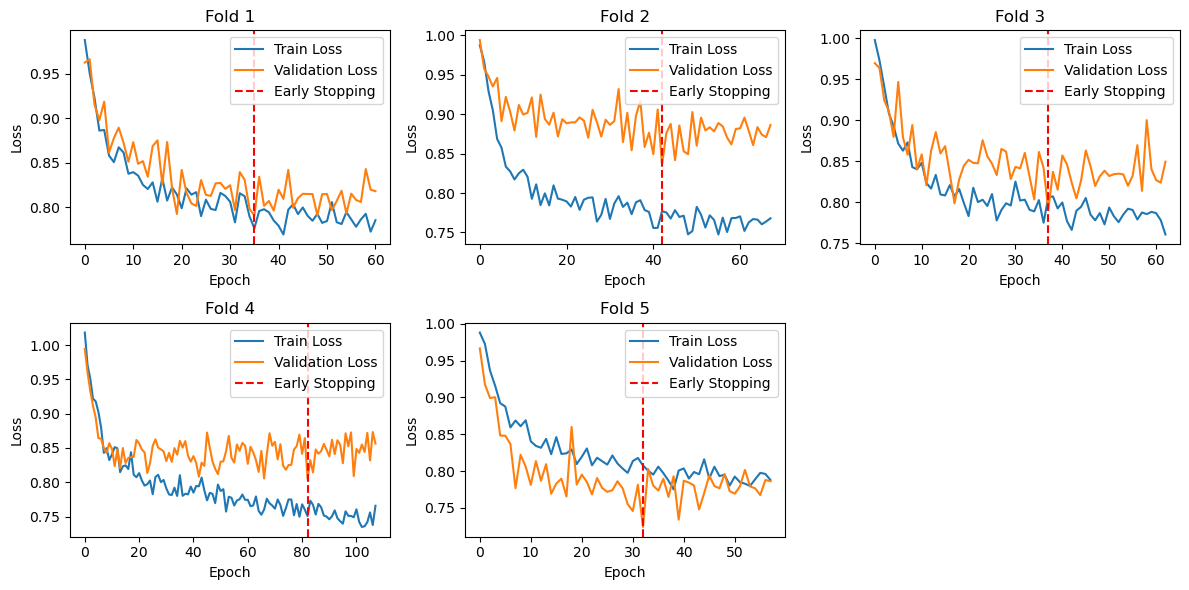

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [36]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-stuttgart-atp-singles',
                                            'past-hertogenbosch-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-hertogenbosch-atp-singles', 'past-stuttgart-atp-singles'} ...
... loaded 78 matches
Updating id table ...
... id table updated


100%|██████████| 2/2 [00:00<00:00, 53.31it/s]

Error 'g0a0' for match Oh6c4ESH in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match WYuCTZFk in tournament past-hertogenbosch-atp-singles
Error 'c0jt' for match Am1pF1lS in tournament past-hertogenbosch-atp-singles
Error 'h0eq' for match hEehX6PO in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match IJwypHBE in tournament past-hertogenbosch-atp-singles
Error 'n0dd' for match reW1aBTi in tournament past-stuttgart-atp-singles
Error 'g0gz' for match Q14yykQa in tournament past-stuttgart-atp-singles
Number of errors : 7 over 78 matches
Number of vectors : 71
Input shapes : [2, 40, 40, 4, 4, 15, 15]


  0%|          | 0/71 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 63
Test Loss: for 1 : 0.91
Test Loss: for 2 : 0.95
Test Loss: for 3 : 0.97
Test Loss: for 4 : 0.98
Test Loss: for 5 : 1.08


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Betting

In [37]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - (1- prob)/(odds))*safe

test = df.copy()
test['prob_player1'] = (1+test['predictions'])/2
test['prob_player2'] = (1-test['predictions'])/2
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)


amount = INIT_AMOUNT
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : j5cd4pTq Humbert U. - Brouwer G., bet on player 1 (model pred = 0.79), amount to bet : 6.30, odds : 1.29, label : 1.00, total amount : 101.83
Match : j5cd4pTq Humbert U. - Brouwer G., no bet on player 2 (model pred =0.21)
Match : p8f62hcU Korda S. - Schoolkate T., bet on player 1 (model pred = 0.79), amount to bet : 6.22, odds : 1.22, label : 1.00, total amount : 103.20
Match : p8f62hcU Korda S. - Schoolkate T., bet on player 2 (model pred =0.21), amount to bet : 0.20, odds : 4.05, label : 1.00, total amount : 102.99
Match : xjDq4CcK Griekspoor T. - McDonald M., bet on player 1 (model pred = 0.79), amount to bet : 6.43, odds : 1.33, label : 1.00, total amount : 105.12
Match : xjDq4CcK Griekspoor T. - McDonald M., no bet on player 2 (model pred =0.21)
Match : YuBq2u9O Mensik J. - Brouwer G., bet on player 1 (model pred =0.77), amount to bet : 6.98, odds : 2.18, label : -1.00, total amount : 98.14
Match : YuBq2u9O Mensik J. - Brouwer G., no bet on player 2 (model pred =0.23)
Matc

## Autre

In [38]:
CONFIDENCE_THRESHLOLD = 0.6

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")


Total amount after betting : 100.00
Relative lost 0.00%
